In [1]:
from collections import deque
import random
import matplotlib.pyplot as plt

In [2]:
def fifo_simulation(reference_string, num_frames, page_size):
    page_faults = 0
    memory = deque(maxlen=num_frames)
    
    # Considerar o tamanho da página (ajuste necessário se a referência for baseada no tamanho da página)
    def get_page_number(reference):
        return reference // page_size
    
    for reference in reference_string:
        page = get_page_number(reference)
        if page not in memory:
            if len(memory) == num_frames:
                memory.popleft()
            memory.append(page)
            page_faults += 1
    
    return page_faults


In [3]:
def aging_simulation(reference_string, num_frames, page_size):
    page_faults = 0
    memory = {}
    age = {}
    
    def get_page_number(reference):
        return reference // page_size
    
    for reference in reference_string:
        page = get_page_number(reference)
        if page not in memory:
            if len(memory) == num_frames:
                oldest_page = min(memory, key=lambda p: age[p])
                del memory[oldest_page]
                del age[oldest_page]
            memory[page] = True
            age[page] = 0
            page_faults += 1
        else:
            age[page] = (age[page] >> 1) | 0x80

        for p in list(age.keys()):
            if p not in memory:
                age[p] = age[p] >> 1

    return page_faults


In [4]:
def generate_reference_string(length, num_pages, page_size):
    return [random.randint(0, num_pages - 1) * page_size for _ in range(length)]

def compare_algorithms(num_frames_list, reference_length, num_pages, page_size):
    fifo_faults = []
    aging_faults = []
    
    reference_string = generate_reference_string(reference_length, num_pages, page_size)
    
    for num_frames in num_frames_list:
        fifo_faults.append(fifo_simulation(reference_string, num_frames, page_size))
        aging_faults.append(aging_simulation(reference_string, num_frames, page_size))
    
    plt.plot(num_frames_list, [faults / reference_length * 1000 for faults in fifo_faults], label='FIFO')
    plt.plot(num_frames_list, [faults / reference_length * 1000 for faults in aging_faults], label='Aging')
    plt.xlabel('Número de Molduras de Página')
    plt.ylabel('Faltas de Página por 1000 Referências')
    plt.legend()
    plt.title('Comparação de Algoritmos de Paginação')
    plt.show()


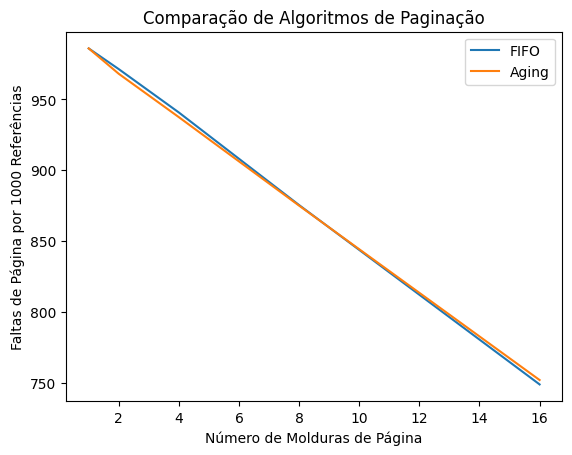

In [5]:
num_frames_list = [1, 2, 4, 8, 16]
reference_length = 10000
num_pages = 32*2
page_size = 4096  # Tamanho da página em bytes

compare_algorithms(num_frames_list, reference_length, num_pages, page_size)
